# ETL

## LOAD DATA
---

### Install the required packages

In [23]:
# remove the '#' to run the command, this is a python script
#pip install -r requirements.txt

### Import and read the csv file

In [24]:
import pandas as pd

raw = pd.read_csv("insurance.csv")

## TRANSFORM DATA
--- 

### Rename the English column names to Portuguese language

In [25]:
raw.rename(
    columns={
        "age": "idade",
        "sex": "genero",
        "bmi": "imc",
        "children": "filhos",
        "smoker": "fumante",
        "region": "regiao",
        "charges": "encargos",
    },
    inplace=True,
)

### Convert the column names and values to Portuguese language

In [26]:
def region_replace(value):
    return {
        "southwest": "sudoeste",
        "southeast": "sudeste",
        "northwest": "noroeste",
        "northeast": "nordeste",
    }.get(value, value)


raw["regiao"] = raw["regiao"].apply(region_replace)
raw["genero"] = raw["genero"].apply(lambda value: "masculino" if value == "male" else "feminino")
raw["fumante"] = raw["fumante"].apply(lambda value: "sim" if value == "yes" else "não")

raw

,idade,genero,imc,filhos,fumante,regiao,encargos
0,19,feminino,27.90,0,sim,sudoeste,16884.9240
1,18,masculino,33.77,1,não,sudeste,1725.5523
2,18,feminino,27.90,0,sim,sudoeste,16884.9240
3,19,masculino,33.77,1,não,sudeste,1725.5523
4,20,masculino,33.00,3,não,sudeste,4449.4620
...,...,...,...,...,...,...,...
1549,50,masculino,30.97,3,não,noroeste,10600.5483
1550,18,feminino,31.92,0,não,nordeste,2205.9808
1551,18,feminino,36.85,0,não,sudeste,1629.8335
1552,21,feminino,25.80,0,não,sudoeste,2007.9450


# Data Display
---

We need to show the data macros and main caracteristics for the data set, as types, values, using statistics and graphs.

### Exploratory Data Analysis (EDA)

#### Dataset Information

In [27]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idade     1554 non-null   int64  
 1   genero    1554 non-null   object 
 2   imc       1554 non-null   float64
 3   filhos    1554 non-null   int64  
 4   fumante   1554 non-null   object 
 5   regiao    1554 non-null   object 
 6   encargos  1554 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 85.1+ KB


#### Dataset Shape

In [28]:
raw.describe()

,idade,imc,filhos,encargos
count,1554.000000,1554.000000,1554.000000,1554.000000
mean,39.276062,30.726792,1.079794,13345.286536
std,14.501694,6.070046,1.200479,12166.395467
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.296250,0.000000,4625.249675
50%,39.000000,30.495000,1.000000,9502.441675
75%,52.000000,34.800000,2.000000,16862.795985
max,70.000000,53.130000,5.000000,63770.428010


#### Dataset Null Values

In [29]:
raw.isnull().sum()

idade       0
genero      0
imc         0
filhos      0
fumante     0
regiao      0
encargos    0
dtype: int64

### Distribution of Ages

In [38]:
import seaborn as sns
sns.color_palette("dark")

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

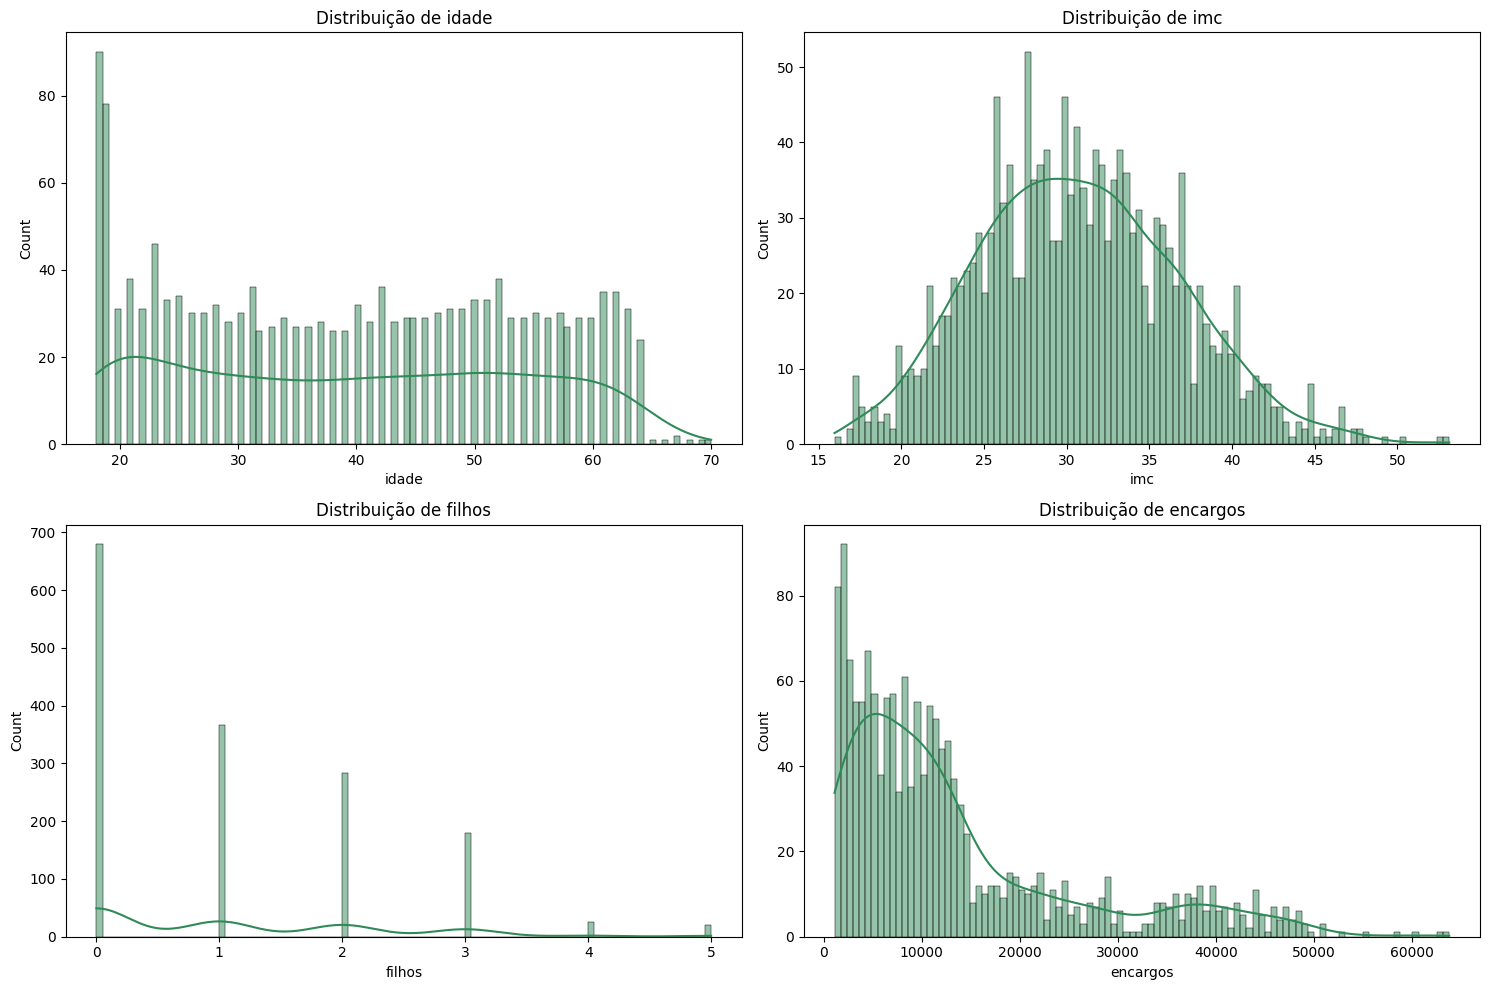

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for idx, column in enumerate(['idade', 'imc', 'filhos', 'encargos']):
    plt.subplot(2, 2, idx + 1)
    sns.histplot(raw[column], kde=True, color='seagreen', edgecolor='k', bins=100)
    plt.title(f'Distribuição de {column}')
plt.tight_layout()
plt.show()